In [65]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import osmnx as ox
import networkx as nx
from pyproj import CRS
import itertools

import pandana

<Axes: >

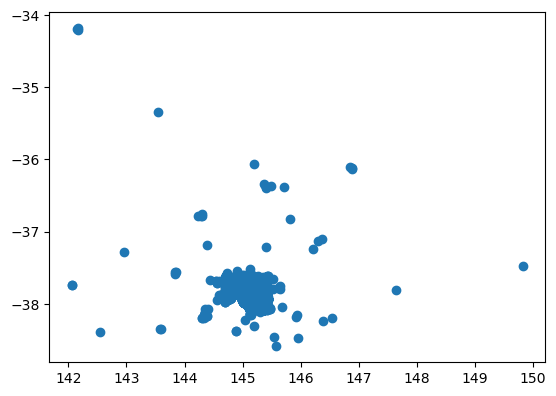

In [66]:
gdf = gpd.read_file('data/features_of_interest/VMFEAT/FOI_POINT.shp')

gdf.plot()

In [67]:
example_pt = gdf['geometry'][0]
example_pt.geoms[0].y


-37.98682710099996

In [68]:
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

sgdf = gdf.sample(1000)

for x in sgdf['geometry']:
    point = x.geoms[0]
    folium.Marker(location=[point.y, point.x]).add_to(m)

    

m


In [70]:
gdf.columns

Index(['UFI', 'PFI', 'FEATURE_ID', 'PARENTFTID', 'FTYPE', 'FEATSUBTYP',
       'FEATSTATUS', 'NAME', 'NAME_LABEL', 'PARENTNAME', 'CHILDEXIST',
       'AUTHORGC', 'AUTHORGID', 'AUTHORGVER', 'VMADD_PFI', 'VICNAMESID',
       'VICNMSTATC', 'THEME1', 'THEME2', 'STATE', 'CRDATE_PFI', 'SUPER_PFI',
       'CRDATE_UFI', 'FEATURE_UF', 'FEATURE_CR', 'geometry'],
      dtype='object')

In [71]:
gdf.head()

,UFI,PFI,FEATURE_ID,PARENTFTID,FTYPE,FEATSUBTYP,FEATSTATUS,NAME,NAME_LABEL,PARENTNAME,...,VICNMSTATC,THEME1,THEME2,STATE,CRDATE_PFI,SUPER_PFI,CRDATE_UFI,FEATURE_UF,FEATURE_CR,geometry
0,61976338,997119,997119,69720.0,recreational resource,playground,None,None,None,BANKSIA RESERVE,...,11,None,None,VIC,2013-12-18,None,2021-10-08,61976338,2021-10-08,MULTIPOINT ((145.04311 -37.98683))
1,64781687,997248,997248,NaN,community venue,hall,None,1ST BEAUMARIS SEA SCOUTS,1st Beaumaris Sea Scouts,None,...,11,None,None,VIC,2013-12-19,None,2022-07-20,64781687,2022-07-20,MULTIPOINT ((145.03760 -37.99075))
2,61976354,997300,997300,NaN,place of worship,church,None,ST MICHAELS ANGLICAN CHURCH,St Michaels Anglican Church,None,...,11,None,None,VIC,2013-12-19,None,2021-10-08,61976354,2021-10-08,MULTIPOINT ((145.03715 -37.99109))
3,62382682,1019570,1019570,NaN,landmark,monument,None,HARRY HAWKER MONUMENT,Harry Hawker Monument,None,...,11,None,None,VIC,2015-11-17,None,2021-11-16,62382682,2021-11-16,MULTIPOINT ((145.09440 -37.97677))
4,62382689,1019578,1019578,78814.0,landmark,monument,None,MENTONE WAR MEMORIAL,Mentone War Memorial,None,...,11,None,None,VIC,2015-11-17,None,2021-11-16,62382689,2021-11-16,MULTIPOINT ((145.06577 -37.99012))


In [72]:
point_counts = [len(geom.geoms) for geom in gdf['geometry']]
multi_points = [count for count in point_counts if count > 1]
print(f'there are {len(multi_points)} rows with multiple points, out of {len(point_counts)}')

there are 208 rows with multiple points, out of 12983


In [84]:
gdf[['FTYPE','FEATURE_ID']].groupby('FTYPE').count().sort_values(by = 'FEATURE_ID', ascending=False)

,FEATURE_ID
FTYPE,
recreational resource,3410
care facility,3355
education centre,1576
sign,1375
community venue,640
place of worship,607
landmark,382
emergency facility,345
communication service,288


In [133]:
cat = 'place of worship'
cutoff = 0

subset = (
    gdf[gdf['FTYPE']==cat]
    [['FEATSUBTYP','FEATURE_ID']]
    .groupby('FEATSUBTYP')
    .count()
    .sort_values(by = 'FEATURE_ID', ascending=False)
    [lambda x: x['FEATURE_ID'] >= cutoff]
)

subset

,FEATURE_ID
FEATSUBTYP,
church,522
mosque,34
synagogue,32
vihara (buddhist),7
gurdwara (sikh),6
mondir (hindu),6


In [141]:

cutoff = 27

subset = (
    gdf
    [gdf['FTYPE']!='sign']
    [gdf['FTYPE']!='excavation site'] 
    [gdf['FTYPE']!='communication service']
    [gdf['FTYPE']!='admin facility']
    [gdf['FTYPE']!='dumping ground']
    [gdf['FTYPE']!='storage facility']
    [['FTYPE','FEATSUBTYP','FEATURE_ID']]
    .groupby(['FTYPE','FEATSUBTYP'])
    .count()
    .sort_values(by = 'FEATURE_ID', ascending=False)
    .sort_values(by = 'FTYPE')
    [lambda x: x['FEATURE_ID'] >= cutoff]
    .reset_index()
)

[print(x) for x in subset.FEATSUBTYP]

child care
aged care
entertainment centre
hall
community centre
senior citizens
art gallery
museum
library
primary/secondary school
special school
primary school
tertiary institution
secondary school
university
police station
ambulance station
fire station
maternal/child health centre
general hospital
day procedure centre
tower
monument
tourist attraction
church
mosque
synagogue
rotunda
day visitor area
club house
picnic site
playground
swimming pool


/opt/homebrew/anaconda3/envs/walkability/lib/python3.11/site-packages/geopandas/geodataframe.py:1474: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/opt/homebrew/anaconda3/envs/walkability/lib/python3.11/site-packages/geopandas/geodataframe.py:1474: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/opt/homebrew/anaconda3/envs/walkability/lib/python3.11/site-packages/geopandas/geodataframe.py:1474: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/opt/homebrew/anaconda3/envs/walkability/lib/python3.11/site-packages/geopandas/geodataframe.py:1474: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/opt/homebrew/anaconda3/envs/walkability/lib/python3.11/site-packages/geopandas/geodataframe.py:1474: UserWarning: Boolean Series key will be re

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [130]:
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

sgdf = gdf[gdf['FEATSUBTYP']=='office']

for x in sgdf['geometry']:
    point = x.geoms[0]
    folium.Marker(location=[point.y, point.x]).add_to(m)    

m


In [131]:
sgdf

,UFI,PFI,FEATURE_ID,PARENTFTID,FTYPE,FEATSUBTYP,FEATSTATUS,NAME,NAME_LABEL,PARENTNAME,...,VICNMSTATC,THEME1,THEME2,STATE,CRDATE_PFI,SUPER_PFI,CRDATE_UFI,FEATURE_UF,FEATURE_CR,geometry
28,68616884,969509,969509,1146331.0,admin facility,office,None,BRAESIDE,Braeside,BRAESIDE PARK,...,11,None,None,VIC,2012-02-15,None,2023-09-21,68616884,2023-09-21,MULTIPOINT ((145.12639 -37.99119))
66,68779348,1004296,1004296,NaN,admin facility,office,None,CFA DISTRICT 08 HQ,CFA District 08 HQ,None,...,11,None,None,VIC,2014-11-05,None,2023-10-19,68779348,2023-10-19,MULTIPOINT ((145.24706 -38.00574))
256,68616957,969645,969645,NaN,admin facility,office,None,OLINDA,Olinda,None,...,11,None,None,VIC,2012-02-15,None,2023-09-21,68616957,2023-09-21,MULTIPOINT ((145.37789 -37.86009))
261,68622187,1262055,1262055,NaN,admin facility,office,None,KNOXFIELD,Knoxfield,None,...,11,None,None,VIC,2020-09-17,None,2023-09-21,68622187,2023-09-21,MULTIPOINT ((145.25402 -37.87420))
376,68616860,969659,969659,1146480.0,admin facility,office,None,POINT COOK,Point Cook,POINT COOK COASTAL PARK,...,11,None,None,VIC,2012-02-15,None,2023-09-21,68616860,2023-09-21,MULTIPOINT ((144.75078 -37.91909))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308,68779489,1246956,1246956,NaN,admin facility,office,None,CFA DISTRICT 13 HQ,CFA District 13 HQ,None,...,11,None,None,VIC,2020-03-17,None,2023-10-19,68779489,2023-10-19,MULTIPOINT ((145.30695 -37.76508))
11572,64547989,1180714,1180714,NaN,admin facility,office,None,MFB THORNBURY COMPLEX,MFB Thornbury Complex,None,...,11,None,None,VIC,2018-05-30,None,2022-06-23,54356804,2018-05-31,MULTIPOINT ((144.98088 -37.75554))
12344,68616916,969670,969670,NaN,admin facility,office,None,RINGWOOD,Ringwood,None,...,11,None,None,VIC,2012-02-15,None,2023-09-21,68616916,2023-09-21,MULTIPOINT ((145.22713 -37.81370))
12431,46922649,1004179,1004179,NaN,admin facility,office,None,AUSTRALIAN CUSTOMS AND BORDER PROTECTION CENTRE,Australian Customs And Border Protection Centre,None,...,11,None,None,VIC,2014-10-23,None,2014-12-12,46922649,2014-12-12,MULTIPOINT ((144.79260 -37.65961))
